<a href="https://www.kaggle.com/code/eddietsai/lstm-stock?scriptVersionId=179935522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [697]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from pandas import read_csv

In [698]:
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [699]:
print(tf.__version__)

2.15.0


In [700]:
df = pd.read_csv('/kaggle/input/dis-csv/DIS.csv',header=None, index_col=None, delimiter=",")

In [701]:
#array to matrices
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [702]:
np.random.seed(10)

In [703]:
all_y = df[5].values
dataset = all_y.reshape(-1, 1)

In [704]:
#normalize
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [705]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size : len(dataset), :]

In [706]:
#reshape into X=t and Y=t+1, timestep 240
look_back = 240
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [707]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [708]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(25, input_shape = (1, look_back)),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(1, activation = 'tanh')
])

model.compile(loss="mse", optimizer="adam",metrics=['R2Score'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [709]:
r=model.fit(X_train, y_train, 
            epochs=100, batch_size=240, 
            verbose=1,validation_data=(X_test, y_test))
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - R2Score: -1.7479 - loss: 0.0055 - val_R2Score: 0.5630 - val_loss: 0.0339
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.5240 - loss: 9.8767e-04 - val_R2Score: -0.0972 - val_loss: 0.0852
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.6865 - loss: 6.5983e-04 - val_R2Score: -0.0227 - val_loss: 0.0794
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.7660 - loss: 4.9432e-04 - val_R2Score: -0.2008 - val_loss: 0.0932
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.8035 - loss: 4.1886e-04 - val_R2Score: -0.0606 - val_loss: 0.0823
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.8268 - loss: 3.4796e-04 - val_R2Score: 0.0210 - val_loss: 0.0760
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.8450 - loss: 3.1453e-04 - val_R2Score: 0.0438 - val_loss: 0.0742
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - R2Score: 0.8553 - loss: 2.9919e-04 - val_R

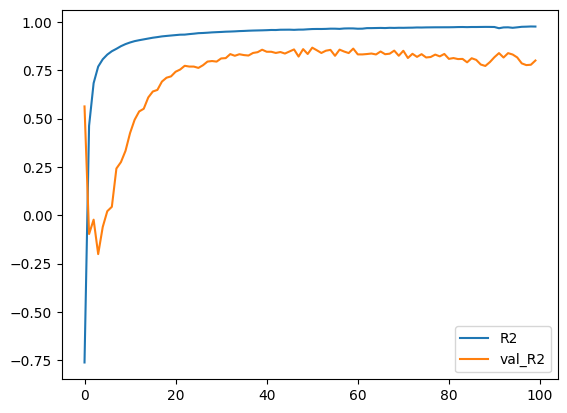

In [710]:
plt.plot(r.history['R2Score'], label='R2')
plt.plot(r.history['val_R2Score'], label='val_R2')
plt.legend()
plt.show()

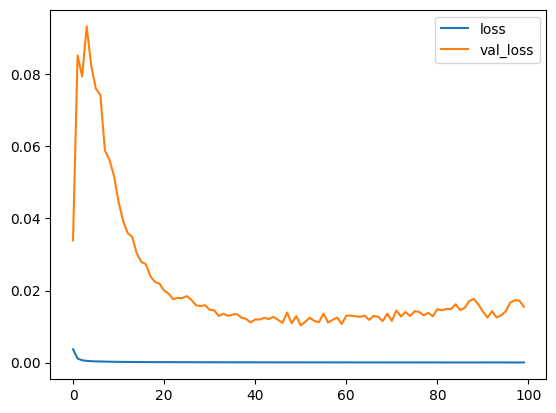

In [711]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [712]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


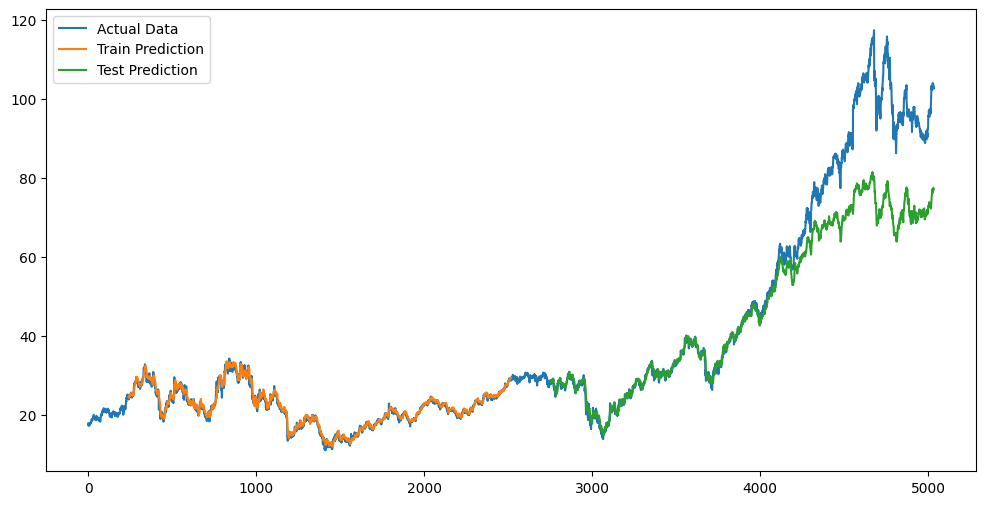

Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_109 (LSTM)                 │ (None, 25)             │        26,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,880 (312.04 KB)

 Trainable params: 26,626 (104.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,254 (208.03 KB)

In [713]:
# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

# Shift train predictions for plotting
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(dataset) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Actual Data')
plt.plot(train_predict_plot, label='Train Prediction')
plt.plot(test_predict_plot, label='Test Prediction')
plt.legend()
plt.show()

# Model summary
model.summary()

In [714]:
df = pd.DataFrame(
    data={
        "prediction": np.around(list(test_predict.reshape(-1)), decimals=2),

    }
)
df.to_csv("lstm_result.csv", sep=";", index=None)